![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

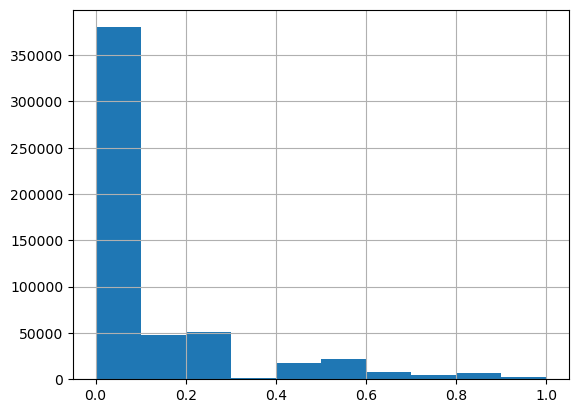

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [5]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [7]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [40]:
# Celda 1
vectorizer1 = CountVectorizer(lowercase=False, max_features=100)
# Se define lowercase=False para no transformar los comentarios a minúscula 
# teniendo en cuenta que esto puede incidir en que sea o no sea tóxico.
# Además, el max features se definió en 100 para reducir la dimensionalidad del problema y optimizar el tiempo en ejecutarse.
# Esto se definió así para todos los modelos por las mismas razones.

In [9]:
X_Train1 = vectorizer1.fit_transform(X_train)
X_Test1 = vectorizer1.transform(X_test)

In [26]:
print(vectorizer1.get_feature_names())

['And', 'If', 'It', 'That', 'The', 'They', 'This', 'Trump', 'We', 'You', 'about', 'all', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'being', 'but', 'by', 'can', 'did', 'do', 'don', 'even', 'for', 'from', 'get', 'good', 'had', 'has', 'have', 'he', 'his', 'how', 'if', 'in', 'is', 'it', 'just', 'know', 'like', 'make', 'many', 'me', 'more', 'much', 'my', 'need', 'no', 'not', 'now', 'of', 'on', 'one', 'only', 'or', 'other', 'our', 'out', 'over', 'people', 'right', 'see', 'should', 'so', 'some', 'than', 'that', 'the', 'their', 'them', 'then', 'there', 'these', 'they', 'think', 'this', 'those', 'time', 'to', 'up', 'was', 'way', 'we', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'would', 'years', 'you', 'your']


In [10]:
decisiontree1 = DecisionTreeRegressor(random_state=42)
decisiontree1.fit(X_Train1, y_train)

DecisionTreeRegressor(random_state=42)

In [11]:
y_pred1 = decisiontree1.predict(X_Test1)

In [12]:
mse1 = mean_squared_error(y_test, y_pred1)
print("MSE:", mse1)

MSE: 0.0761119877839853


El modelo de regresión a usar será arboles de decisión, puesto que los árboles de decisión son fáciles de interpretar y pueden manejar datos categóricos y numéricos. Respecto al MSE, la predicción del modelo tiene un error de 0.076 en la escala de 0 a 1 para predecir si un comentario es tóxico o no, lo que sugiere que el modelo tiene un rendimiento relativamente bueno pues el error es cercano a 0.

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [13]:
# Celda 2
vectorizer2 = CountVectorizer(lowercase=False, max_features=100, ngram_range=(3,3))

In [14]:
X_Train2 = vectorizer2.fit_transform(X_train)
X_Test2 = vectorizer2.transform(X_test)

In [27]:
print(vectorizer2.get_feature_names())

['It is not', 'It would be', 'Thank you for', 'There is no', 'This is not', 'This is the', 'We need to', 'all of the', 'and it is', 'are going to', 'as long as', 'as much as', 'as well as', 'at the time', 'back to the', 'be able to', 'because of the', 'but it is', 'do you think', 'don want to', 'end of the', 'going to be', 'has nothing to', 'have to be', 'https www youtube', 'if you are', 'in order to', 'in the US', 'in the first', 'in the last', 'in the past', 'in the same', 'in the world', 'in this country', 'is going to', 'is not the', 'is one of', 'is that the', 'it comes to', 'it is not', 'it is the', 'it will be', 'it would be', 'look at the', 'most of the', 'need to be', 'needs to be', 'not going to', 'nothing to do', 'of the people', 'of the world', 'one of the', 'out of the', 'part of the', 'rest of the', 'rest of us', 'seem to be', 'seems to be', 'should have been', 'should not be', 'some of the', 'that is the', 'that it is', 'that there is', 'that they are', 'the United Stat

In [15]:
decisiontree2 = DecisionTreeRegressor(random_state=42)
decisiontree2.fit(X_Train2, y_train)

DecisionTreeRegressor(random_state=42)

In [16]:
y_pred2 = decisiontree2.predict(X_Test2)

In [17]:
mse2 = mean_squared_error(y_test, y_pred2)
print("MSE:", mse2)

MSE: 0.03991647882697295


Respecto al MSE, la predicción del modelo tiene un error de 0.04 en la escala de 0 a 1 para predecir si un comentario es tóxico o no, lo que sugiere que el modelo tiene un rendimiento relativamente bueno pues el error es cercano a 0; es un rendimiento mejor al primer modelo pues posee un menor error. También, al considerar trigramas, esto permite capturar mejor la relación entre las palabras en los comentarios, lo que puede mejorar la precisión del modelo y por lo tanto es mejor que el primer modelo.

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

* En qué consiste? 

La función TfidfVectorizer es una técnica de tokenización que se utiliza en el procesamiento de texto. Consiste en convertir una colección de documentos de texto en una matriz de términos y sus frecuencias. La técnica TfidfVectorizer asigna un peso a cada término en función de su importancia en el documento.
El acrónimo TF-IDF significa "Term Frequency - Inverse Document Frequency", que en español significa Frecuencia del Término - Frecuencia Inversa del Documento. La frecuencia del término se refiere a la cantidad de veces que un término aparece en un documento, mientras que la frecuencia inversa del documento se refiere a la cantidad de veces que aparece un término en la colección de documentos en general.

*  Ventajas o desventajas 

La ventaja de la técnica TfidfVectorizer es que penaliza los términos que aparecen con mucha frecuencia en un documento, ya que se consideran menos importantes para la identificación del contenido del documento en comparación con los términos que aparecen con menos frecuencia. Además, esta técnica también permite detectar la presencia de palabras clave que son relevantes en la identificación del tema del documento. En comparación con la función CountVectorizer, TfidfVectorizer tiene la ventaja de asignar un peso a cada término en función de su importancia en lugar de simplemente contar la cantidad de veces que aparece cada término. Sin embargo, la desventaja es que puede ser más lento y requiere más recursos computacionales debido a los cálculos adicionales que realiza para asignar los pesos.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [19]:
# Celda 4
vectorizer3 = TfidfVectorizer(lowercase=False, max_features=100)

In [20]:
X_Train3 = vectorizer3.fit_transform(X_train)
X_Test3 = vectorizer3.transform(X_test)

In [30]:
print(vectorizer3.get_feature_names())

['And', 'If', 'It', 'That', 'The', 'They', 'This', 'Trump', 'We', 'You', 'about', 'all', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'being', 'but', 'by', 'can', 'did', 'do', 'don', 'even', 'for', 'from', 'get', 'good', 'had', 'has', 'have', 'he', 'his', 'how', 'if', 'in', 'is', 'it', 'just', 'know', 'like', 'make', 'many', 'me', 'more', 'much', 'my', 'need', 'no', 'not', 'now', 'of', 'on', 'one', 'only', 'or', 'other', 'our', 'out', 'over', 'people', 'right', 'see', 'should', 'so', 'some', 'than', 'that', 'the', 'their', 'them', 'then', 'there', 'these', 'they', 'think', 'this', 'those', 'time', 'to', 'up', 'was', 'way', 'we', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'would', 'years', 'you', 'your']


In [21]:
decisiontree3 = DecisionTreeRegressor(random_state=42)
decisiontree3.fit(X_Train3, y_train)

DecisionTreeRegressor(random_state=42)

In [22]:
y_pred3 = decisiontree3.predict(X_Test3)

In [23]:
mse3 = mean_squared_error(y_test, y_pred3)
print("MSE:", mse3)

MSE: 0.07091479550014566


Respecto al MSE, la predicción del modelo tiene un error de 0.07 en la escala de 0 a 1 para predecir si un comentario es tóxico o no, lo que sugiere que el modelo tiene un rendimiento relativamente bueno pues el error es cercano a 0; es un rendimiento muy relativamente mejor al primer modelo pues posee un menor error, aunque es un margen muy pequeño.

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

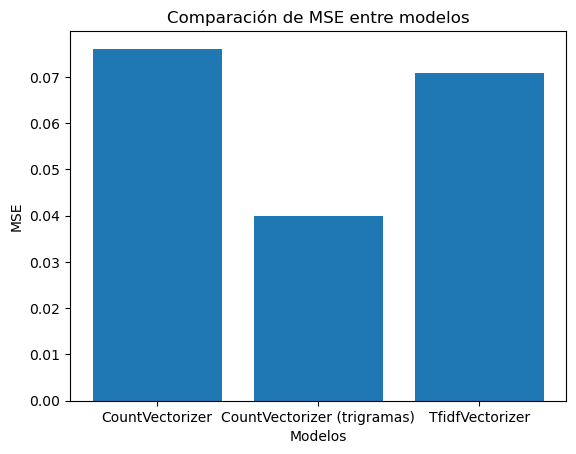

In [37]:
# Celda 5
modelos = ['CountVectorizer', 'CountVectorizer (trigramas)', 'TfidfVectorizer']
fig, grafica = plt.subplots()
grafica.bar(modelos, [mse1, mse2, mse3])
grafica.set_xlabel('Modelos')
grafica.set_ylabel('MSE')
grafica.set_title('Comparación de MSE entre modelos')
plt.show()

Para este problema donde se busca predecir la toxicidad de un comentario, vemos que el modelo que utiliza CountVectorizer con trigramas tiene el mejor rendimiento. Este modelo permite capturar mejor la relación entre las palabras en los comentarios, lo que puede mejorar la precisión del modelo y por lo tanto es mejor que los dos modelos vistos, lo que sugiere que en este conjunto de datos en particular, tener en cuenta las combinaciones de tres palabras consecutivas puede ser más útil que utilizar la técnica TfidfVectorizer y que no considerar trigramas.

También, cabe aclarar que la cantidad de datos que son considerados con probabilidad favorable de ser tóxicos (mayores a 0.5 en target) son minoría en los datos tal y como se puede observar en el histograma al inicio de este Notebook.  Lo cierto es que cada modelo se ajustará a los datos de acuerdo a cómo estén definidos y para este conjunto en particular, se llegó a la conclusión que el mejor modelo que predice la toxicidad de un comentario es el modelo CountVectorizer con trigramas por tener un menor MSE.